## Get SRL Sentences for AMR annotation

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
from collections import defaultdict

In [163]:
intersecting_predicates_filepath = "../data/srl_amr_intersecting_predicates.txt"
srl_annotation_filepath = "../data/SRL/sentence_predicate_pair_Richard.txt"
srl_sentence_amr_annotation_filepath = "../data/AMR/srl_sentence_amr_annotation_{}.txt"

In [132]:
def get_intersecting_predicates(filepath=intersecting_predicates_filepath):
    intersecting_predicates = []
    with open(filepath, "r") as f:
        line = f.readline()
        while line:
            intersecting_predicates.append(line.strip())
            line = f.readline()
    return intersecting_predicates


def get_annotated_sentence_predicate_pairs(filepath=srl_annotation_filepath):
    sentence_predicate_pairs = []
    srl_annotation_df = pd.read_csv(filepath, sep=filepath, header=None)
    for index, row in srl_annotation_df.iterrows():
        sentence, predicate = row[0].split('|')
        sentence_predicate_pairs.append((sentence, predicate))
    return sentence_predicate_pairs

In [133]:
intersecting_predicates = get_intersecting_predicates()

In [134]:
annotated_sentence_predicate_pairs = get_annotated_sentence_predicate_pairs() 

/home/adylanrff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


### Do analysis per intersecting predicates

In [135]:
intersecting_predicates_sentences_dict = defaultdict(list)
for predicate in intersecting_predicates:
    for pair in annotated_sentence_predicate_pairs:
        annotated_sentence, annotated_predicate = pair
        if (predicate == annotated_predicate):
            intersecting_predicates_sentences_dict[predicate].append(annotated_sentence)

#### See sentence distribution / predicate

TOtal: 958 sentences

kembali : 1
naik : 1
terjun : 1
tunggu : 1
fokus : 1
timbul : 1
blokir : 1
berangkat : 2
menandatangani : 2
edar : 2
akhir : 2
tulis : 2
tutup : 2
bahas : 2
sambang : 3
alami : 3
kerja : 3
diri : 3
kira : 3
bawa : 3
benar : 4
lihat : 4
panggil : 4
imbau : 5
lapor : 6
yakin : 6
putus : 7
ada : 8
bagi : 8
guna : 8
buat : 9
catat : 11
minta : 12
beri : 12
pasti : 12
jadi : 26
ungkap : 28
nyata : 30
tambah : 30
jelas : 30
laku : 31
sebut : 34
aku : 34
tutur : 40
dapat : 113
kata : 407


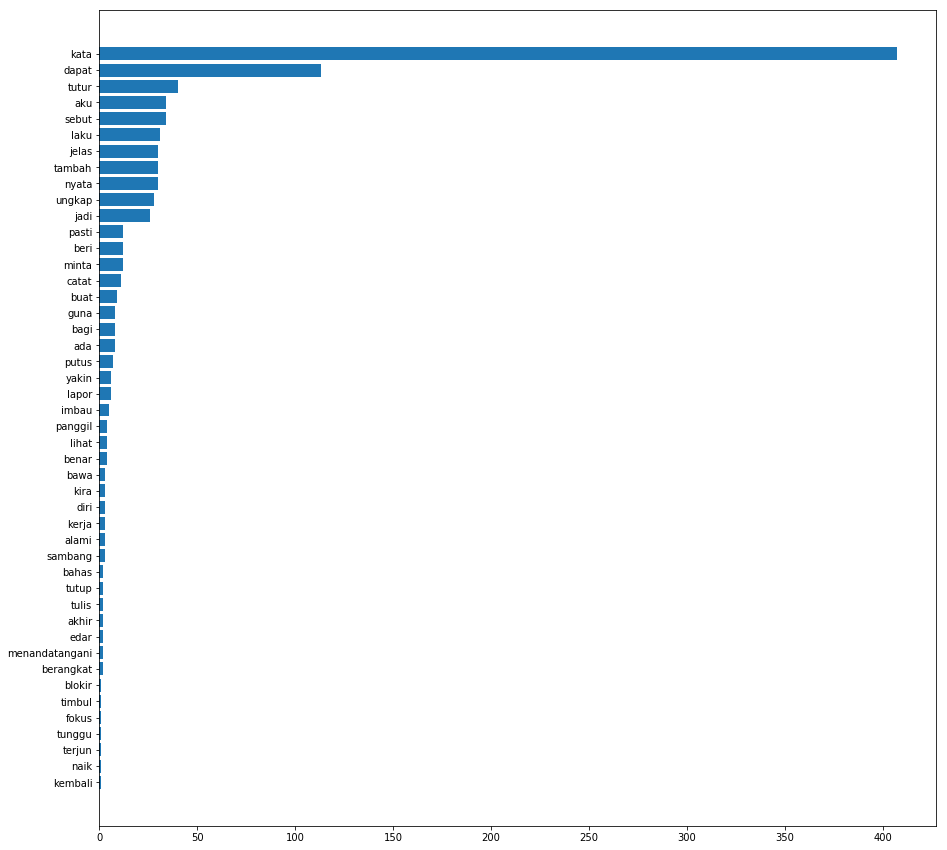

In [148]:
x = [key for key in intersecting_predicates_sentences_dict]
y = [len(intersecting_predicates_sentences_dict[key]) for key in intersecting_predicates_sentences_dict]


sorted_distribution = sorted(list(zip(x,y)), key=lambda x: x[1])
sorted_distribution_x = [e[0] for e in sorted_distribution]
sorted_distribution_y = [e[1] for e in sorted_distribution]

print("TOtal: {} sentences\n".format(sum(y)))

for distribution in sorted_distribution:
    print("{} : {}".format(distribution[0], distribution[1]))

plt.barh(sorted_distribution_x,sorted_distribution_y)
plt.show()

### Get the first 100 sentence 

In [166]:
sentence_segments = []
current_sentence_segment = []

current_sentence_count = 0
for key in sorted_distribution_x:
    for sentence in intersecting_predicates_sentences_dict[key]:
        if (current_sentence_count < 100):
            current_sentence_segment.append(sentence)
            current_sentence_count += 1
        else:
            sentence_segments.append(current_sentence_segment)
            current_sentence_count = 0
            current_sentence_segment = []

In [168]:
for idx, segment in enumerate(sentence_segments):
    with open(srl_sentence_amr_annotation_filepath.format(idx+1), 'w') as f:
        for sentence in segment:
            f.writelines("{}\n\n".format(sentence))
            f.writelines("--------------------\n".format(sentence))            